### Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import GridSearchCV

from sklearn import metrics
from sklearn.metrics import accuracy_score, recall_score, f1_score, confusion_matrix, classification_report

from sklearn.metrics import confusion_matrix
import joblib


import warnings
warnings.filterwarnings("ignore")

### Read_Data

In [39]:
df = pd.read_csv('/content/diabetes_prediction_dataset.csv')

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [41]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [42]:
print('The Shape Of Data Is ==> ', df.shape)

The Shape Of Data Is ==>  (100000, 9)


In [43]:
df.isnull().sum()


,0
gender,0
age,0
hypertension,0
heart_disease,0
smoking_history,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0


In [44]:
df.duplicated().sum()


3854

In [45]:
df = df.drop_duplicates()
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [46]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [47]:
df.smoking_history.value_counts()

,count
smoking_history,
never,34398
No Info,32887
former,9299
current,9197
not current,6367
ever,3998


In [48]:
df.gender.value_counts()

,count
gender,
Female,56161
Male,39967
Other,18


In [49]:
df.diabetes.value_counts()

,count
diabetes,
0,87664
1,8482


In [50]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['gender']= label_encoder.fit_transform(df['gender'])
df['smoking_history']=label_encoder.fit_transform(df['smoking_history'])

In [51]:
df.head(4)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0


In [52]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [53]:
x

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,4,25.19,6.6,140
1,0,54.0,0,0,0,27.32,6.6,80
2,1,28.0,0,0,4,27.32,5.7,158
3,0,36.0,0,0,1,23.45,5.0,155
4,1,76.0,1,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...,...
99994,0,36.0,0,0,0,24.60,4.8,145
99996,0,2.0,0,0,0,17.37,6.5,100
99997,1,66.0,0,0,3,27.83,5.7,155
99998,0,24.0,0,0,4,35.42,4.0,100


In [54]:
y

,diabetes
0,0
1,0
2,0
3,0
4,0
...,...
99994,0
99996,0
99997,0
99998,0


## model_1 Training

In [55]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 , random_state=42 )

In [56]:
model_1 = LogisticRegression()
model_1.fit(x_train , y_train)


LogisticRegression()

In [57]:
model_1_predict = model_1.predict(x_test)

In [58]:
model_1_score = model_1.score(x_test , y_test)
model_1_score

0.9509100364014561

In [59]:
print(metrics.classification_report(y_test , model_1_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97     17509
           1       0.81      0.59      0.68      1721

    accuracy                           0.95     19230
   macro avg       0.88      0.79      0.83     19230
weighted avg       0.95      0.95      0.95     19230



## Visulization

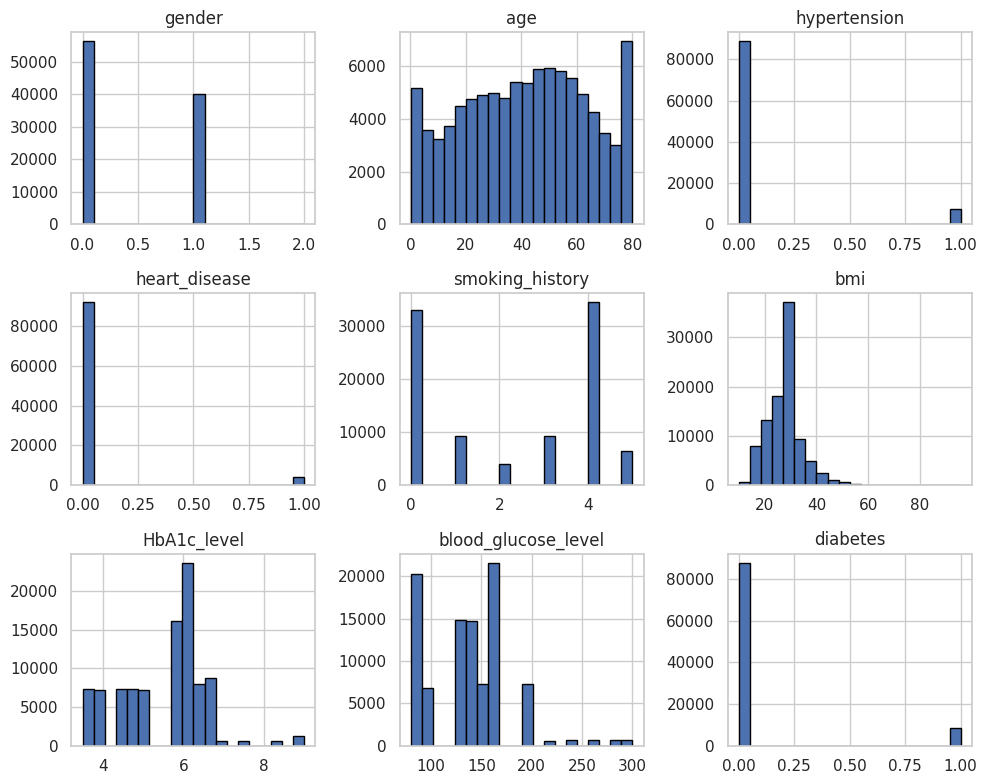

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for aesthetics
sns.set(style="whitegrid")

# Plot histograms for each feature
df.hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.tight_layout()
plt.show()


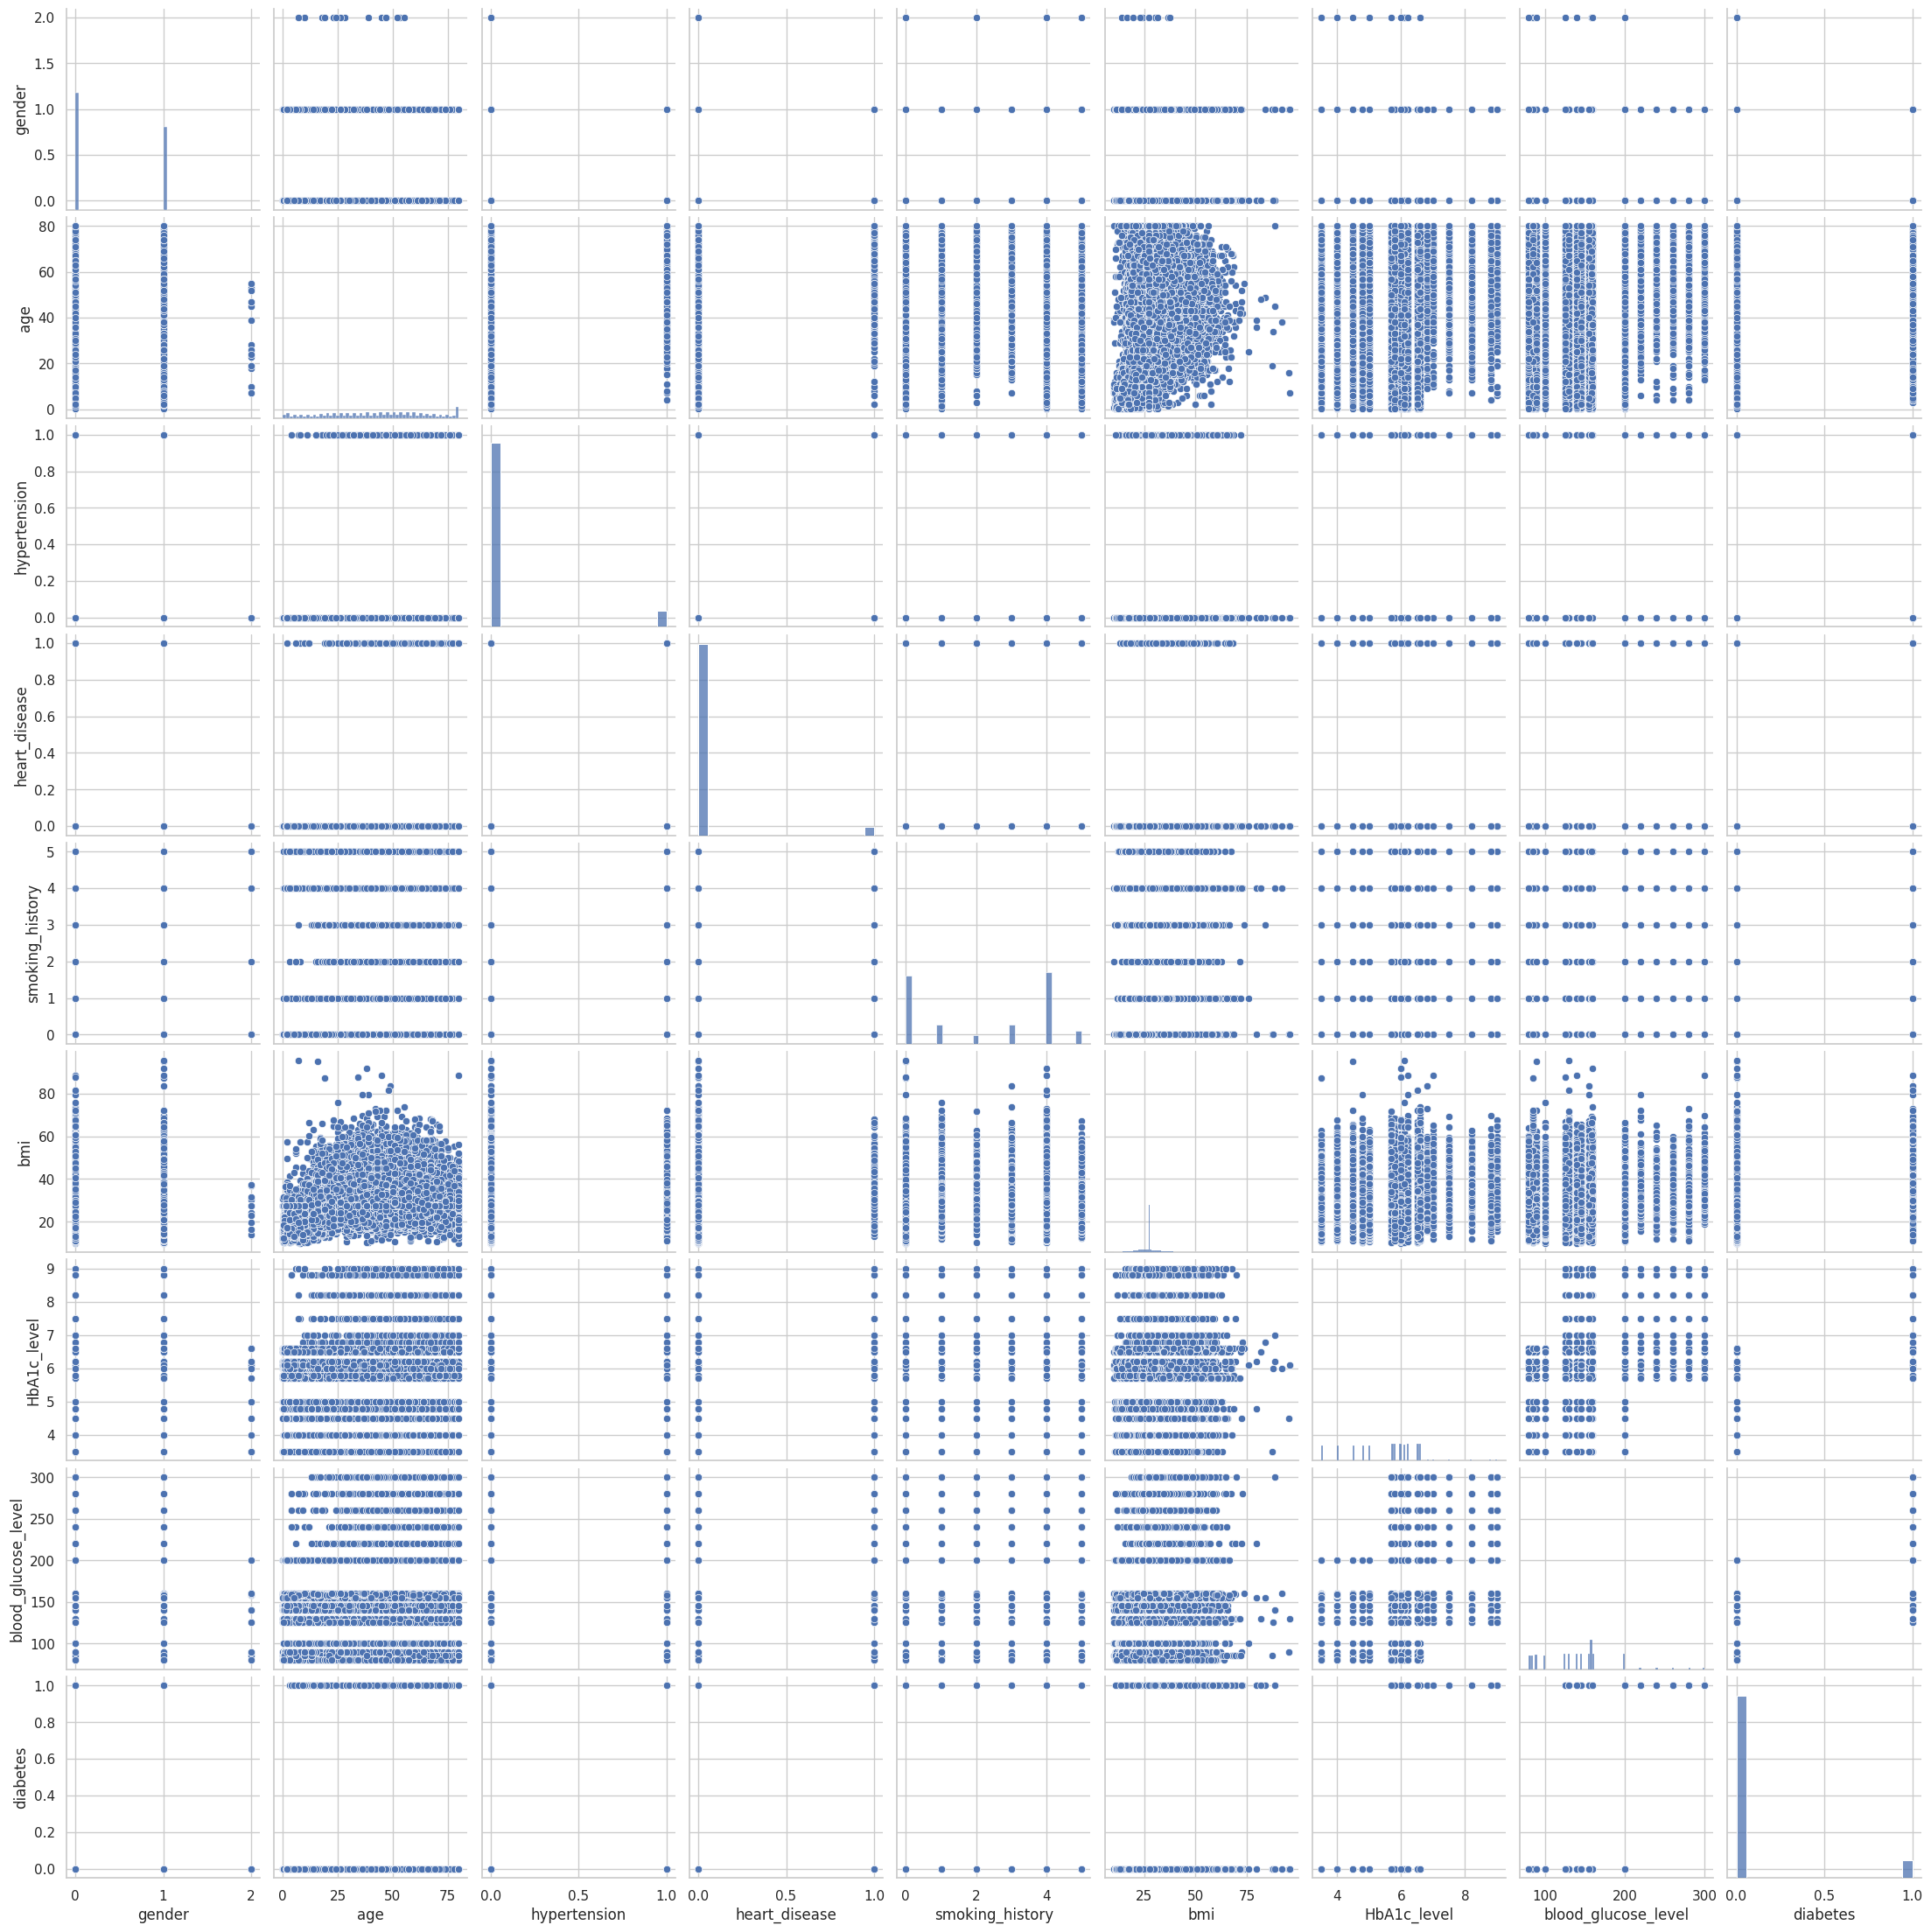

In [26]:
# Plot pair plot to visualize relationships between features
sns.pairplot(df)
plt.show()


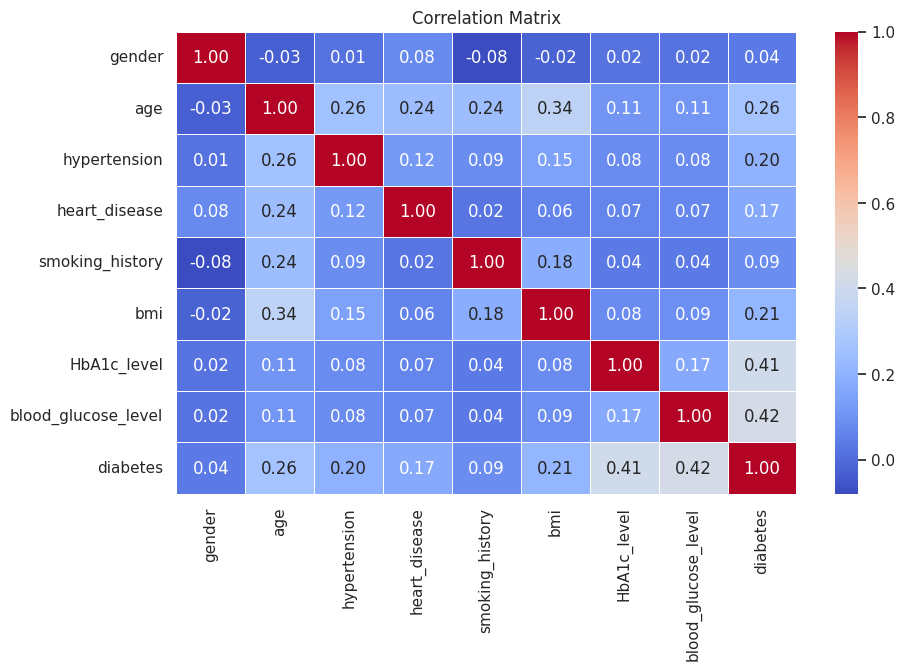

In [27]:
# Calculate the correlation matrix
corr_matrix = df.corr()

# Visualize the correlation matrix with a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


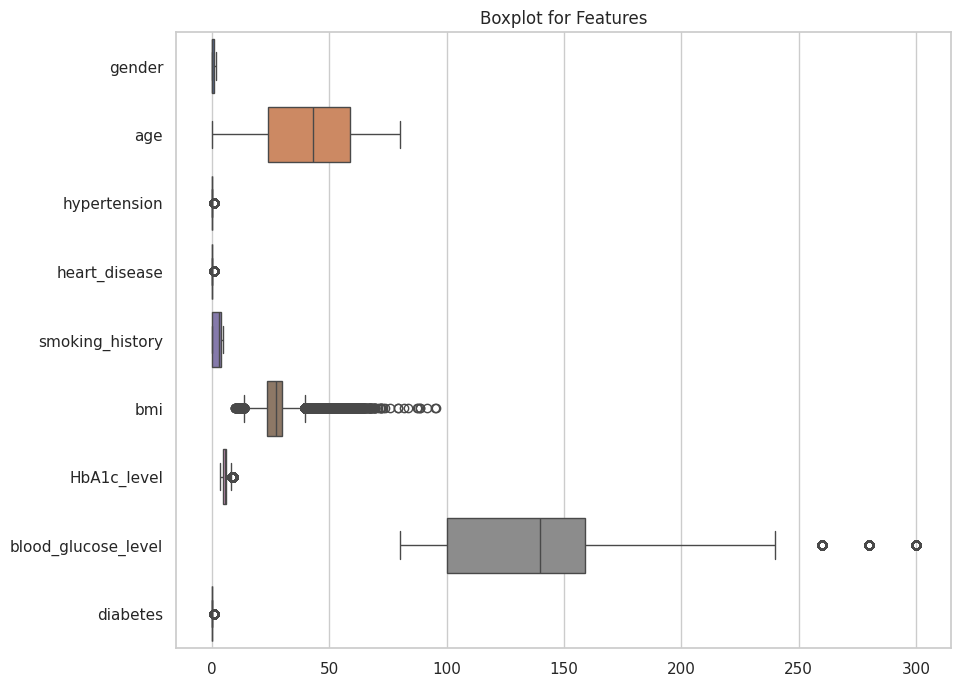

In [28]:
# Boxplot for each feature to detect outliers
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, orient='h')
plt.title('Boxplot for Features')
plt.show()


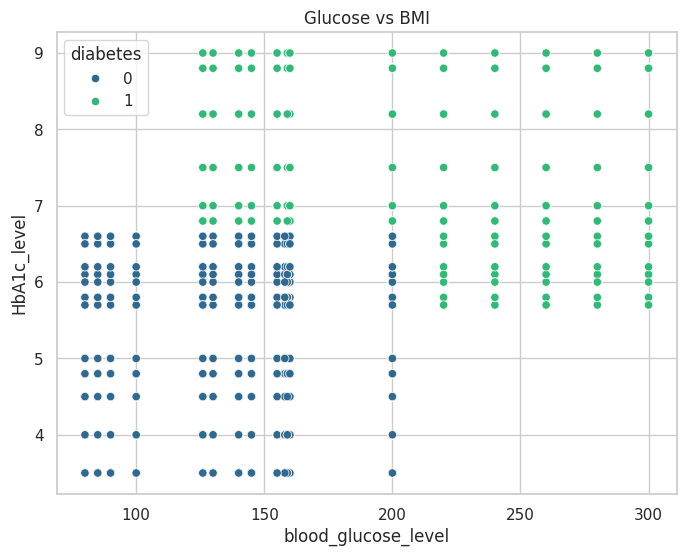

In [32]:
# Scatter plot to see the relationship between 'Glucose' and 'BMI'
plt.figure(figsize=(8, 6))
sns.scatterplot(x='blood_glucose_level', y='HbA1c_level', hue='diabetes', data=df, palette="viridis")
plt.title('Glucose vs BMI')
plt.show()


## outliers

In [60]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [61]:
# Step 2: Handle outliers in X
for col in ['bmi', 'blood_glucose_level']:  # Specify columns to process
    lower_bound = x[col].quantile(0.01)  # 1st percentile
    upper_bound = x[col].quantile(0.99)  # 99th percentile
    x[col] = np.clip(x[col], lower_bound, upper_bound)

In [62]:
mms = RobustScaler()
x_scale = mms.fit_transform(x)
x_scale

array([[ 0.        ,  1.05714286,  0.        , ..., -0.32972136,
         0.57142857,  0.        ],
       [ 0.        ,  0.31428571,  0.        , ...,  0.        ,
         0.57142857, -1.01694915],
       [ 1.        , -0.42857143,  0.        , ...,  0.        ,
        -0.07142857,  0.30508475],
       ...,
       [ 1.        ,  0.65714286,  0.        , ...,  0.07894737,
        -0.07142857,  0.25423729],
       [ 0.        , -0.54285714,  0.        , ...,  1.25386997,
        -1.28571429, -0.6779661 ],
       [ 0.        ,  0.4       ,  0.        , ..., -0.75696594,
         0.57142857, -0.84745763]])

In [63]:
x_train , x_test , y_train , y_test = train_test_split(x_scale , y , test_size=0.2 , random_state=42 )


In [64]:
# Define models with their respective hyperparameters
models_with_params = {
    "Logistic Regression": {
        "model": LogisticRegression(max_iter=1000, random_state=42),
        "params": {
            "C": [0.01, 0.1, 1, 10],
            "solver": ["liblinear", "saga"]
        }
    },
    "SVC": {
        "model": SVC(random_state=42),
        "params": {
            "C": [0.1, 1, 10],
            "kernel": ["linear", "rbf"],
            "gamma": ["scale", "auto"]
        }
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100, 200],
            "max_depth": [None, 10, 20],
            "min_samples_split": [2, 5, 10]
        }
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {
            "n_estimators": [50, 100],
            "learning_rate": [0.01, 0.1, 0.2],
            "max_depth": [3, 5, 7]
        }
    },
    "Neural Network": {
        "model": MLPClassifier(random_state=42, max_iter=500),
        "params": {
            "hidden_layer_sizes": [(16, 8), (32, 16), (64, 32)],
            "activation": ["relu", "tanh"],
            "solver": ["adam", "sgd"]
        }
    }
}

In [65]:
# Initialize results
results = {"Algorithm": [], "Accuracy": [], "Recall": [], "F1 Score": []}

# SMOTE initialization
smote = SMOTE(random_state=42)

In [66]:
# Hyperparameter tuning and training function
def evaluate_model_with_hyperparameters(model_name, model, params, x_train, y_train, x_test, y_test):
    print(f"Evaluating {model_name} with hyperparameters tuning...")

    # Perform hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(estimator=model, param_grid=params, cv=3, scoring="accuracy", verbose=1)
    grid_search.fit(x_train, y_train)

    # Best model from grid search
    best_model = grid_search.best_estimator_

    # Apply SMOTE to handle class imbalance for the best model
    x_resampled, y_resampled = smote.fit_resample(x_train, y_train)

    # Train the best model on resampled data
    best_model.fit(x_resampled, y_resampled)

    # Make predictions
    predictions = best_model.predict(x_test)

    # Calculate metrics
    accuracy = accuracy_score(y_test, predictions)
    recall = recall_score(y_test, predictions, average='weighted')  # 'weighted' for multi-class
    f1 = f1_score(y_test, predictions, average='weighted')

    # Append metrics to results
    results["Algorithm"].append(model_name)
    results["Accuracy"].append(accuracy)
    results["Recall"].append(recall)
    results["F1 Score"].append(f1)

    # Display confusion matrix
    print(f"Confusion Matrix for {model_name}:")
    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, predictions), annot=True, fmt='g', cmap="Blues")
    plt.title(f"Confusion Matrix: {model_name}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    # Print metrics
    print(f"{model_name} Performance:")
    print(f"Best Hyperparameters: {grid_search.best_params_}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    # Generate classification report
    clf_report = classification_report(y_test, predictions)
    print(f"Classification Report for {model_name}:")
    print(clf_report)

    # Save classification report to a text file
    with open("best_classification_report.txt", "a") as file:
        file.write(f"Classification Report for {model_name}:\n")
        file.write(clf_report)
        file.write("\n\n" + "="*50 + "\n\n")

    # Save the best model using joblib
    joblib.dump(best_model, f"best_model_{model_name}.joblib")

    print("-" * 50)
    return best_model, accuracy, recall, f1


Evaluating Logistic Regression with hyperparameters tuning...
Fitting 3 folds for each of 8 candidates, totalling 24 fits
Confusion Matrix for Logistic Regression:


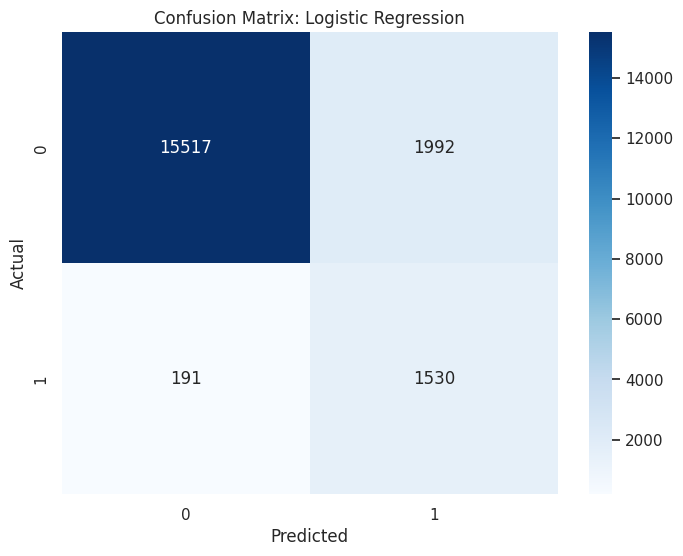

Logistic Regression Performance:
Best Hyperparameters: {'C': 0.1, 'solver': 'liblinear'}
Accuracy: 0.8865
Recall: 0.8865
F1 Score: 0.9029
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.89      0.93     17509
           1       0.43      0.89      0.58      1721

    accuracy                           0.89     19230
   macro avg       0.71      0.89      0.76     19230
weighted avg       0.94      0.89      0.90     19230

--------------------------------------------------
Evaluating SVC with hyperparameters tuning...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Confusion Matrix for SVC:


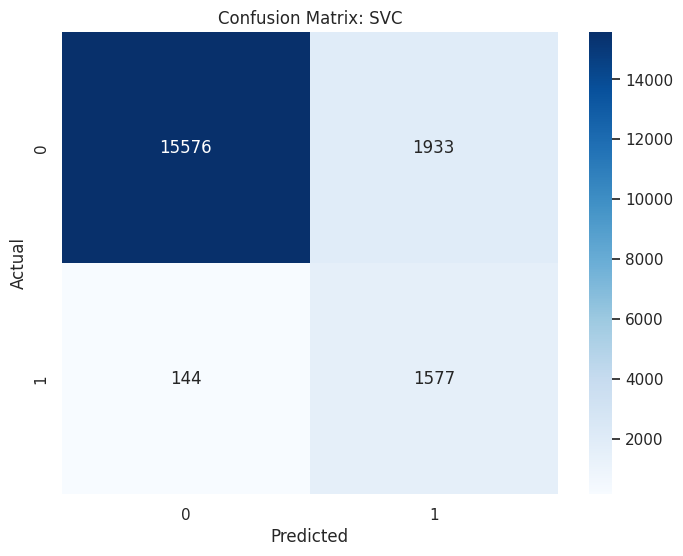

SVC Performance:
Best Hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Accuracy: 0.8920
Recall: 0.8920
F1 Score: 0.9076
Classification Report for SVC:
              precision    recall  f1-score   support

           0       0.99      0.89      0.94     17509
           1       0.45      0.92      0.60      1721

    accuracy                           0.89     19230
   macro avg       0.72      0.90      0.77     19230
weighted avg       0.94      0.89      0.91     19230

--------------------------------------------------
Evaluating Random Forest with hyperparameters tuning...
Fitting 3 folds for each of 27 candidates, totalling 81 fits
Confusion Matrix for Random Forest:


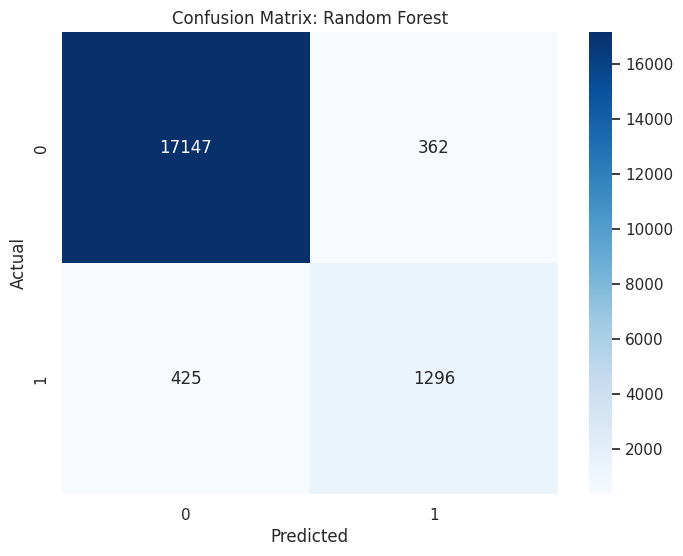

Random Forest Performance:
Best Hyperparameters: {'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.9591
Recall: 0.9591
F1 Score: 0.9587
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98     17509
           1       0.78      0.75      0.77      1721

    accuracy                           0.96     19230
   macro avg       0.88      0.87      0.87     19230
weighted avg       0.96      0.96      0.96     19230

--------------------------------------------------
Evaluating Gradient Boosting with hyperparameters tuning...
Fitting 3 folds for each of 18 candidates, totalling 54 fits
Confusion Matrix for Gradient Boosting:


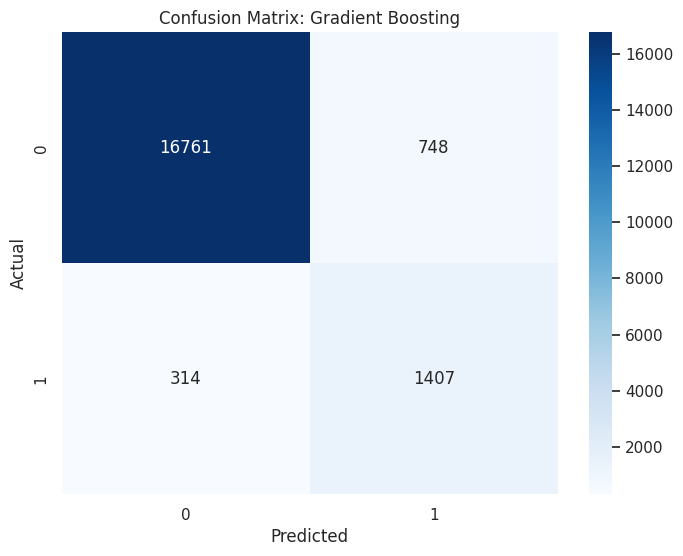

Gradient Boosting Performance:
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 50}
Accuracy: 0.9448
Recall: 0.9448
F1 Score: 0.9475
Classification Report for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.98      0.96      0.97     17509
           1       0.65      0.82      0.73      1721

    accuracy                           0.94     19230
   macro avg       0.82      0.89      0.85     19230
weighted avg       0.95      0.94      0.95     19230

--------------------------------------------------
Evaluating Neural Network with hyperparameters tuning...
Fitting 3 folds for each of 12 candidates, totalling 36 fits
Confusion Matrix for Neural Network:


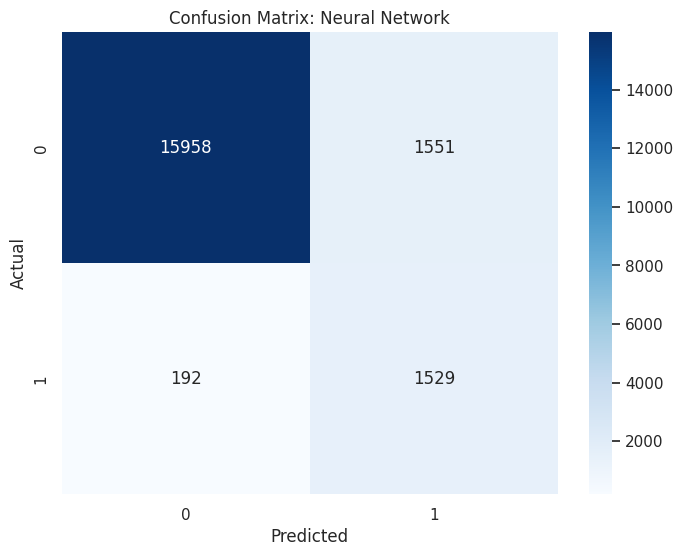

Neural Network Performance:
Best Hyperparameters: {'activation': 'relu', 'hidden_layer_sizes': (16, 8), 'solver': 'adam'}
Accuracy: 0.9094
Recall: 0.9094
F1 Score: 0.9204
Classification Report for Neural Network:
              precision    recall  f1-score   support

           0       0.99      0.91      0.95     17509
           1       0.50      0.89      0.64      1721

    accuracy                           0.91     19230
   macro avg       0.74      0.90      0.79     19230
weighted avg       0.94      0.91      0.92     19230

--------------------------------------------------
Best Model: Random Forest
Best Accuracy: 0.9591
Best Recall: 0.9591
Best F1 Score: 0.9587

Final Results with Best Model Highlighted:


,Algorithm,Accuracy,Recall,F1 Score,Best Model
0,Logistic Regression,0.886479,0.886479,0.902899,
1,SVC,0.891992,0.891992,0.907554,
2,Random Forest,0.959074,0.959074,0.958730,Best Model
3,Gradient Boosting,0.944774,0.944774,0.947519,
4,Neural Network,0.909360,0.909360,0.920359,


In [67]:
# Evaluate all models with hyperparameter tuning
best_model = None
best_accuracy = 0
best_recall = 0
best_f1 = 0
best_model_name = ""

for model_name, model_info in models_with_params.items():
    model = model_info["model"]
    params = model_info["params"]
    best_model_temp, accuracy, recall, f1 = evaluate_model_with_hyperparameters(
        model_name, model, params, x_train, y_train, x_test, y_test
    )

    # Track the best model based on accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_recall = recall
        best_f1 = f1
        best_model_name = model_name
        best_model = best_model_temp

# Print the best model's final metrics
print(f"Best Model: {best_model_name}")
print(f"Best Accuracy: {best_accuracy:.4f}")
print(f"Best Recall: {best_recall:.4f}")
print(f"Best F1 Score: {best_f1:.4f}")

# Save best model and classification report
with open("best_classification_report.txt", "a") as file:
    file.write(f"Best Model: {best_model_name}\n")
    file.write(f"Best Accuracy: {best_accuracy:.4f}\n")
    file.write(f"Best Recall: {best_recall:.4f}\n")
    file.write(f"Best F1 Score: {best_f1:.4f}\n")

# Final Results DataFrame highlighting the best model
final_results = pd.DataFrame(results)
final_results["Best Model"] = final_results["Accuracy"].apply(lambda x: "Best Model" if x == best_accuracy else "")
final_results = final_results.style.apply(
    lambda x: ["background: yellow" if v == "Best Model" else "" for v in x], axis=1
)

print("\nFinal Results with Best Model Highlighted:")
final_results


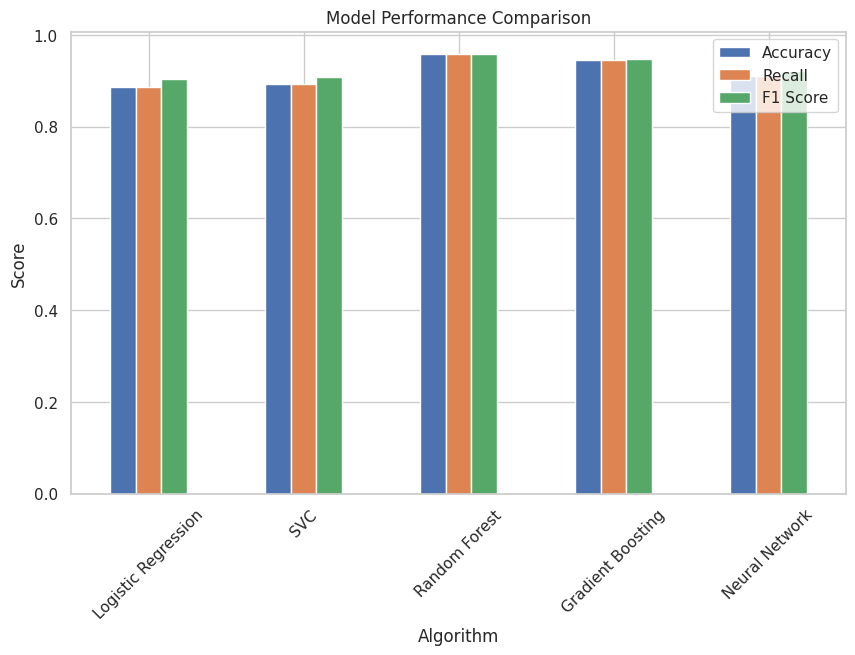

In [68]:
# Visualize the results
final_results_df = final_results.data  # Convert to DataFrame to plot
final_results_df.plot(x="Algorithm", kind="bar", figsize=(10, 6), title="Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=45)
plt.show()


## Test dummy data

In [74]:
new_data = np.array([[1, 60, 1, 1, 1, 25.9, 6.5, 215]])

# Use the loaded model 'model' for prediction
prediction = model.predict(new_data)
print("Predicted result (1 means diabetic, 0 means not diabetic):", prediction[0])

# Use the loaded model 'model' for probability prediction
probability = model.predict_proba(new_data)[0, 1]
print(f"Probability of diabetes: {probability * 100:.2f}%")

Predicted result (1 means diabetic, 0 means not diabetic): 1
Probability of diabetes: 95.57%
